## Keras Datasets

In [ ]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [ ]:
train_images_vector = train_images.reshape(60000, 784)
train_images_vector.shape

(60000, 784)

In [ ]:
train_images_vector = train_images_vector.astype('float32')
train_images_vector.dtype

dtype('float32')

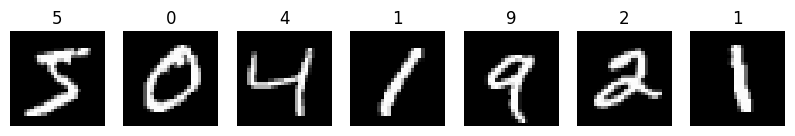

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(10, 5))
for i in range(len(axes)):
  axes[i].imshow(train_images[i], cmap='gray')
  axes[i].set_title(train_labels[i])
  axes[i].set_axis_off()

## Tensorflow Datasets

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
ds, info = tfds.load('mnist', split=['train', 'test'], with_info=True)

In [ ]:
type(ds[0])

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
isinstance(ds[1], tf.data.Dataset)

True

In [ ]:
print(len(ds[1]))
print(ds[1].element_spec)

10000
{'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}


In [ ]:
sample = ds[0].take(1)
for item in sample:
  print(type(item['image']))
  print(item.keys())
  print(item['image'].shape)
  print(tf.shape(item['image']))
  print(item['label'])

<class 'tensorflow.python.framework.ops.EagerTensor'>
dict_keys(['image', 'label'])
(28, 28, 1)
tf.Tensor([28 28  1], shape=(3,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int64)


In [ ]:
type(tfds.as_numpy(item['image']))

numpy.ndarray

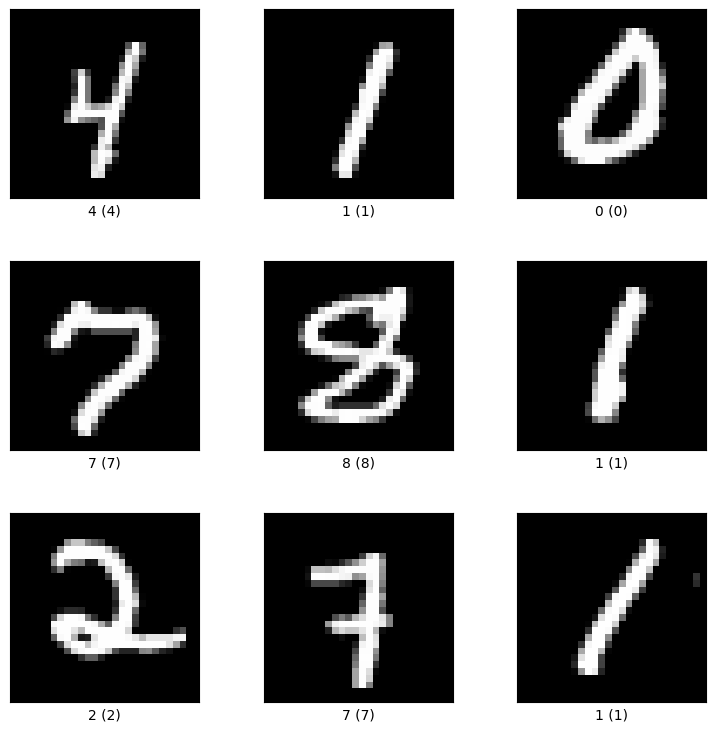

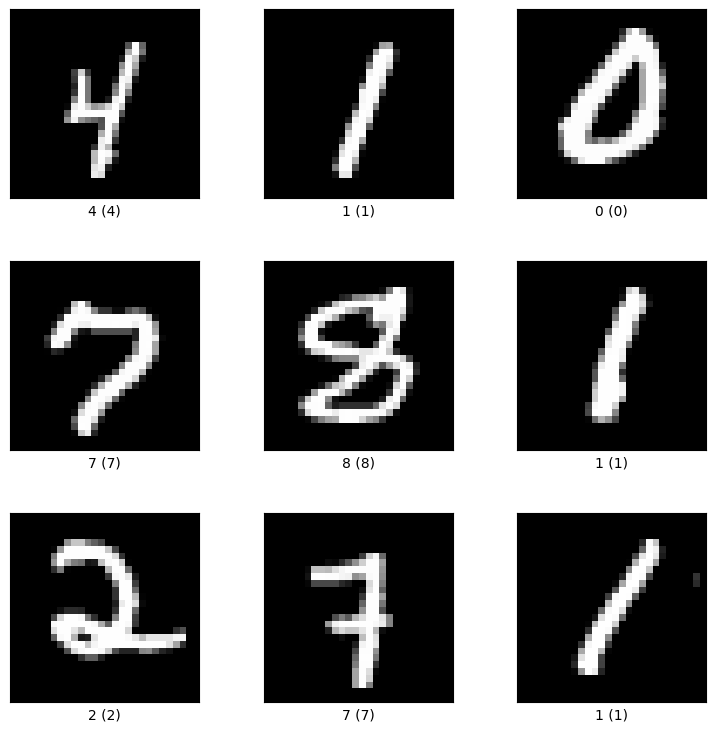

In [ ]:
tfds.show_examples(ds[0], info)

### Prepare tfds for Train

In [ ]:
train_dataset, test_dataset = tfds.load('mnist', split=['train', 'test'],
                                        as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def preprocess_data(images, labels):
    images = tf.reshape(images, (len(images), 784,))
    inputs = {"images": images, "labels": labels}
    outputs = inputs
    return outputs['images'], outputs['labels']

In [ ]:
train_dataset2 = train_dataset.batch(128).map(
    lambda x, y: preprocess_data(x, y),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(
            tf.data.AUTOTUNE)
test_dataset2 = test_dataset.batch(128).map(
    preprocess_data, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
        tf.data.AUTOTUNE)

In [ ]:
sample1 = train_dataset2.take(1)

for image, label in sample1:
  print(image.shape)
  print(label)

(128, 784)
tf.Tensor(
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3 0 9 4 9 0
 6 8 4 7 2 6 0 3 1 1 7 2 4 4 6 5 1 9 3 2 4 3 4 4 7 5 8 1 1 4 1 5 3 5 8 4 1
 1 4 5 3 2 4 1 4 8 1 2 1 9 0 7 6 7 4 4 9 7 5 6 8 4 6 9 2 9 4 4 9 5 4 5 7 7
 1 8 3 7 9 8 4 9 2 8 0 3 9 4 7 6 6], shape=(128,), dtype=int64)


## Model Design

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

## Training

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Train with Keras Dataset

In [ ]:
model.fit(train_images_vector, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 13s 23ms/step - loss: 5.3735 - accuracy: 0.8990
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.6736 - accuracy: 0.9551
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.4722 - accuracy: 0.9653
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3612 - accuracy: 0.9716
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2999 - accuracy: 0.9768


### Train with TensorFlow Dataset

In [ ]:
model.fit(train_dataset2, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 5.9804 - accuracy: 0.9002
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7369 - accuracy: 0.9539
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4654 - accuracy: 0.9651
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3622 - accuracy: 0.9721
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3166 - accuracy: 0.9766
